# Resim Okuma ve Gösterim

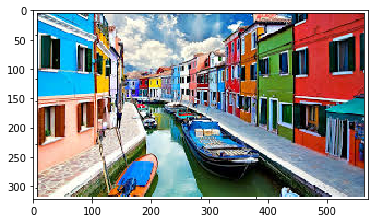

In [16]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Import the image
img = cv2.imread('a.png') # OpenCV ile okuduk 
plt.imshow(img); # matplotlib.pyplot ile görüntüleyelim

# OpenCV BGR renk formatında çalışırken Matplotlib RGB renk sıralamasıyla çalışır. Dönüşüm yapalım

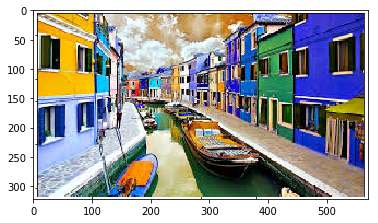

In [4]:
# Convert the image into RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

# Gri ton gösterim

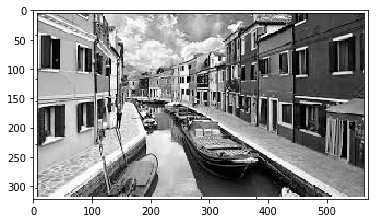

In [5]:
# Convert the image into gray scale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap = 'gray')

# Resmimizin 3 Renk (R-G-B) katmanını ayrı ayrı görelim

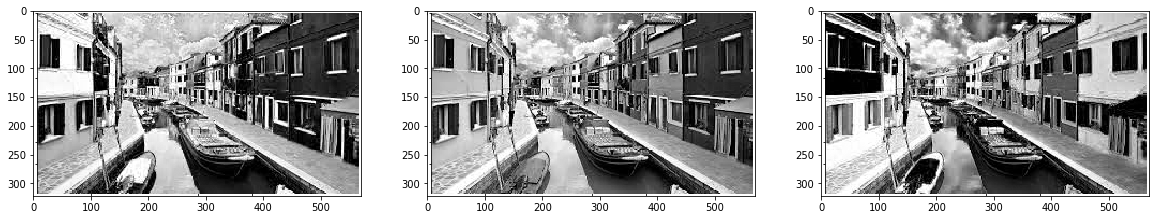

In [18]:
# Plot the three channels of the image
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 20))
kanallar=['R','G','B']

for i in range(0, 3):
    ax = axs[i]
    ax.imshow(img_rgb[:, :, i], cmap = 'gray')
plt.show()

### Yukarıdaki resimlere bir göz atın. Üç resim size her kanalın nasıl oluştuğunu gösterir. R kanalı resminde, kırmızı renk doygunluğunun yüksek olduğu bölüm beyaz görünüyor. Bunun nedeni kırmızı renkli kısımlardaki değerlerin 255 civarında olacağıdır. Ve gri tonlama modunda değer ne kadar yüksek olursa renk o kadar beyaz olur. Bunu G veya B kanallarıyla da kontrol edebilir ve belirli parçaların birbirinden farklı olduğunu karşılaştırabilirsiniz.

# Resmi HSV ve HLS formatına Dönüştürmek

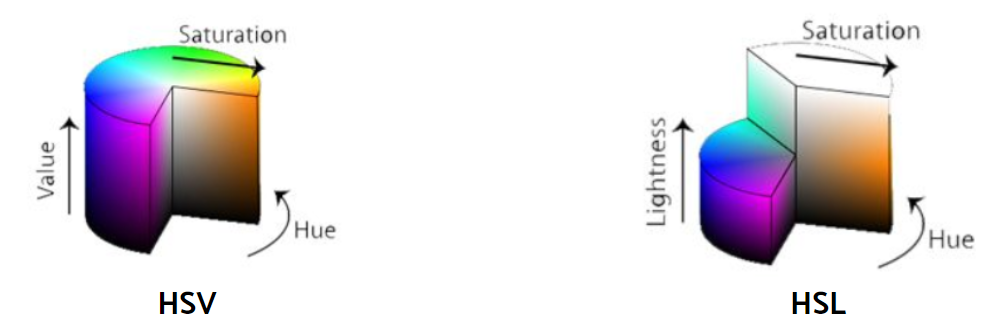

In [14]:
from IPython.display import Image
Image(filename='b.png') 

### HSV ve HLS biraz farklı bir görünüme sahiptir. Yukarıda gördüğünüz gibi, üç boyutlu bir gösterimleri var ve bu, insan algı tarzına daha çok benziyor. HSV ton, doygunluk ve değer anlamına gelir. HSL ton, doygunluk ve parlaklığı ifade eder. HSV'nin merkez ekseni, renklerin değeridir; HSL için ise ışık miktarıdır. Orta eksendeki açılar boyunca, gerçek renkler, renk tonu vardır. Ve merkez eksenden olan uzaklık doygunluğa aittir. Renk modunu dönüştürmek aşağıdaki gibi yapılabilir.

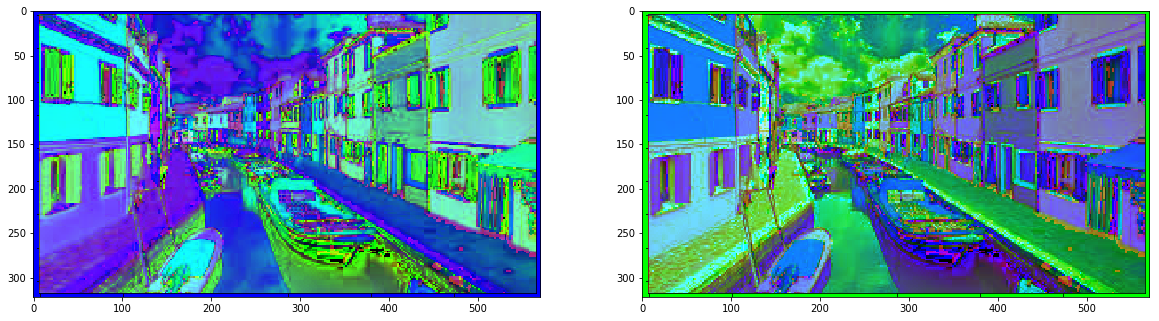

In [13]:
# Transform the image into HSV and HLS models
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)

# Plot the converted images
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 20))
ax1.imshow(img_hsv)
ax2.imshow(img_hls)
plt.show()

### Peki neden renkleri dönüştürmek zorundayız? Cevap verebilecek bir örnek, şerit algılamadır. Lütfen aşağıdaki resme bakınız. Farklı renk modlarında şeritlerin nasıl algılandığını görün. Bilgisayarla görme görevi sırasında maskeleme ile birlikte çoklu renk modu dönüşümü yapıyoruz.

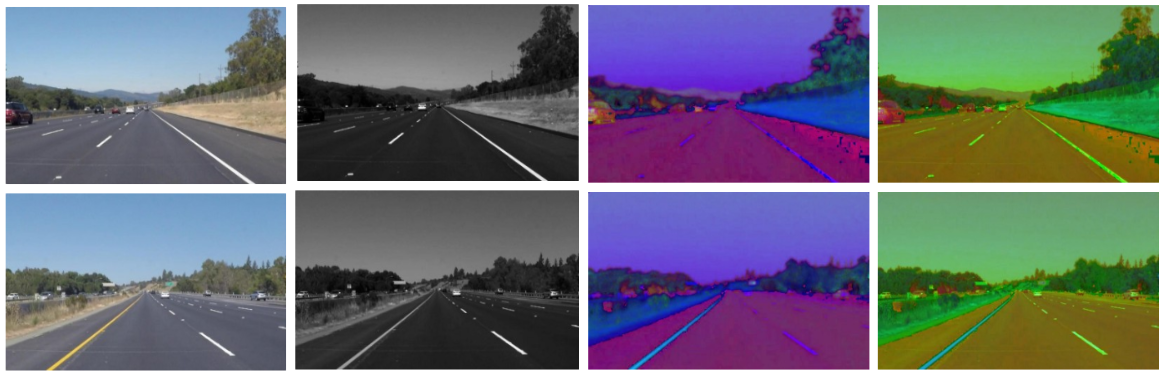

In [19]:
from IPython.display import Image
Image(filename='c.png') 

# Görüntü Üzerinde Çizim

### Aşağıdaki resimde dikdörtgen çizelim

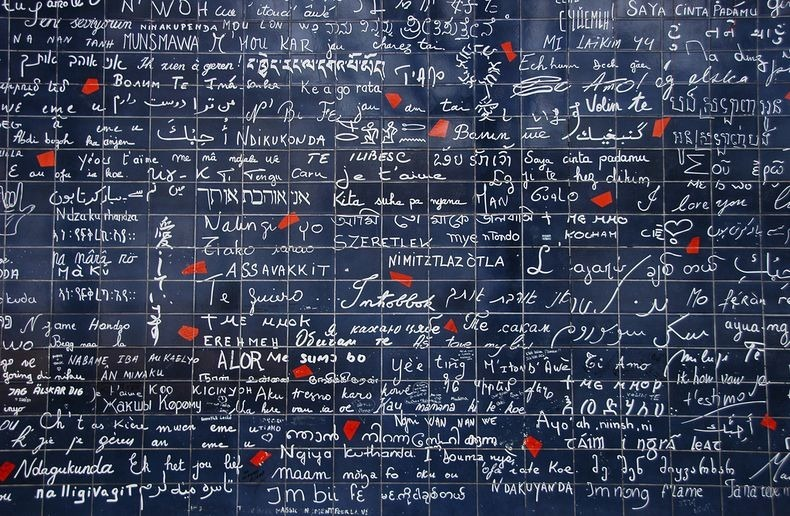

In [20]:
Image(filename='d.jpg') 

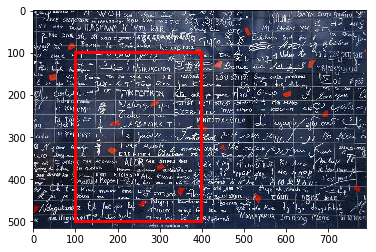

In [36]:
# Copy the image
img=cv2.imread('d.jpg')
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_copy = img.copy()
# Draw a rectangle 
cv2.rectangle(img_copy, pt1 = (100, 100), pt2 = (400, 500), 
              color = (255, 0, 0), thickness = 5)
plt.imshow(img_copy)

In [25]:
print(img_copy.shape)

(516, 790, 3)


### Şimdi de bir çember çizelim

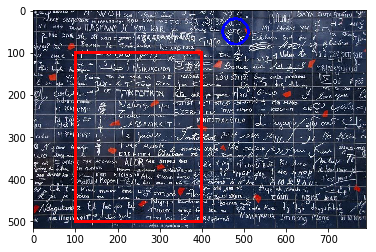

In [37]:
# Draw a circle 
cv2.circle(img_copy, center = (480, 50), radius = 30, 
           color = (0, 0, 255), thickness = 5)
plt.imshow(img_copy)

### Bir de yazı ekleyelim

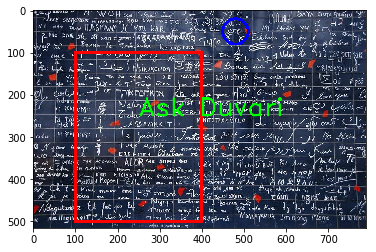

In [38]:
# Add text 
cv2.putText(img_copy, text = "Ask Duvari", 
            org = (250, 250),
            fontFace = cv2.FONT_HERSHEY_DUPLEX, 
            fontScale = 2, 
            color = (0, 255, 0), 
            thickness = 2, 
            lineType = cv2.LINE_AA)
plt.imshow(img_copy)

# Aşağıdaki dünya haritasına mouse ile  imleç koyalım

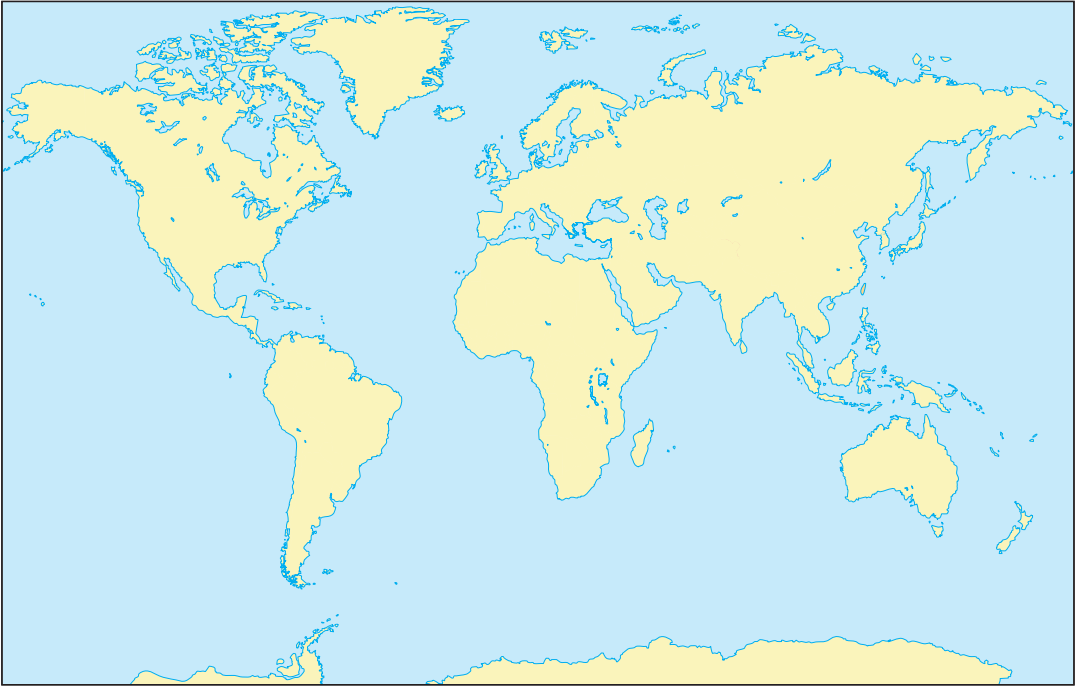

In [39]:
Image(filename='e.png') 

### Mouse tıklama fonksiyonunu tanımlayalım

In [49]:
# Step 1. Define callback function
def draw_circle(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
            cv2.circle(img, center = (x, y), radius = 5, 
                       color = (87, 184, 237), thickness = -1)
    elif event == cv2.EVENT_RBUTTONDOWN:        
            cv2.circle(img, center = (x, y), radius = 10,  
                       color = (87, 184, 237), thickness = 1)

### Resmimizi çağıralım ve yukarıda oluşturduğumuz metodu uygulayalım

In [50]:
# Step 2. Call the window
img = cv2.imread('e.png')
cv2.namedWindow(winname = 'my_drawing')
cv2.setMouseCallback('my_drawing', draw_circle)

In [51]:
# Step 3. Execution
while True:
    cv2.imshow('my_drawing',img)
    if cv2.waitKey(10) & 0xFF == 27:
        break
cv2.destroyAllWindows()

# Şimdi de Dikdörtgen çizelim

In [52]:
import cv2
import numpy as np

# Step 1. Define callback function
drawing = False
ix = -1
iy = -1

def draw_rectangle(event, x, y, flags, params):

    global ix, iy, drawing

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y
        
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.rectangle(img, pt1 = (ix, iy), pt2 = (x, y), 
                          color = (87, 184, 237), thickness = -1)
            
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        cv2.rectangle(img, pt1 = (ix, iy), pt2 = (x, y), 
                      color = (87, 184, 237), thickness = -1)
        
    
# Step 2. Call the window
img = cv2.imread('e.png')

cv2.namedWindow(winname = 'my_drawing')
cv2.setMouseCallback('my_drawing', draw_rectangle)


# Step 3. Execution 
while True: 
    cv2.imshow('my_drawing', img)
    if cv2.waitKey(10) & 0xFF == 27:
        break

cv2.destroyAllWindows()

# Faydalı olması dileğiyle